Before we graph our data we have to decide what kind of visualization will work best. 

Data can be divided into for types. These for types can be grouped in to two catagories

### Qualitative/categorical Data

Nominal: pure labels without a discernable order. (labels can't be ranked least to greatest.

i.e. countries, movie genres, dinner choices

Great visualization strategies: frequency Bar Chart(strongly agree to strongly disagree),

Ordinal: Labels with intrinsic order or ranking.

letter grades, rankings

Great visualization strategies: Ranked bar chart(males v females),

### Quantitative/numeric Data

Interval: numeric values where absolute differences are meaningful and operations like addition and subtraction can be made. This type of data is countable

i.e year or tempature

Ratio: numeric variables where relative difference are meaningful. multiplication and division can be made. This type of data is not countable

word count, weights

#### Discrete vs Continues Quantitive data

Discrete: values are limited to a specific set of variables or a range. like a line segment

Continuous: no limitations to numeric value. like a line

#### Enough Explanation time for code!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

first we've imported our libraries. We use numpy and pandas to group and manipulate our data. matplotlib and seaborn are used to visualize our data. In narrow circumstances pandas can also be used to visualize our data.


before we can do anything we have to make sure to set up matplotlib to work with jupyter notebook:

In [3]:
%matplotlib inline

Now we'll import some data to work with. We will be using a set of pokemon data. We start by using pandas to import our data and see the shape and a sample of our data

In [4]:
pokemon = pd.read_csv("./pokemon.csv")
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


Let's start with a categorical Bar Chart. We will do this with pokemon heights. this is more of a numerical data though

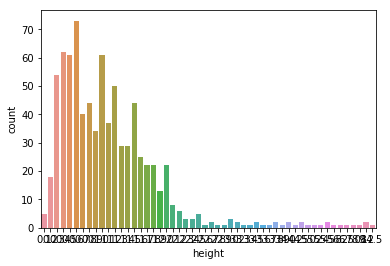

In [5]:
sb.countplot(data = pokemon, x='height');

we can see that the majority of pokemon are short

the colors above could be distracting so we will change that

In [6]:
basecolor = sb.color_palette()[0]

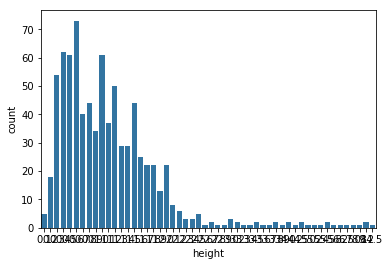

In [7]:
sb.countplot(data = pokemon, x='height', color= basecolor)

we can find out exactly how many there are of each hight with pandas

In [8]:

pokemon['height'].value_counts()

0.6     73
0.4     62
1.0     61
0.5     61
0.3     54
1.2     50
0.8     44
1.5     44
0.7     40
1.1     37
0.9     34
1.3     29
1.4     29
1.6     25
1.7     22
1.8     22
2.0     22
0.2     18
1.9     13
2.1      8
2.2      6
2.5      5
0.1      5
2.4      3
3.0      3
2.3      3
9.2      2
4.0      2
4.5      2
5.5      2
3.2      2
3.5      2
3.8      2
2.7      2
14.5     1
7.0      1
6.5      1
5.0      1
6.2      1
3.7      1
5.8      1
4.2      1
8.8      1
2.9      1
2.6      1
5.4      1
3.4      1
5.2      1
3.6      1
2.8      1
3.9      1
3.3      1
Name: height, dtype: int64

as you can see it's a little hard to read the labels in our graphs above. we can change this with matplotlibs .xticks method

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

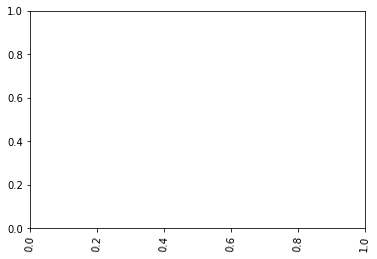

In [9]:
plt.xticks(rotation = 85)

we can also do this by flipping our bar chart on it's side. This is as easy as changing one letter

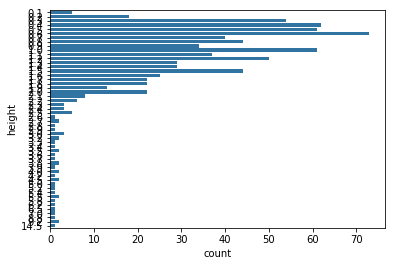

In [10]:
sb.countplot(data = pokemon, y='height', color=basecolor)

In [11]:
n_pokemon = pokemon.shape[0]
n_heights = len(pokemon['height'].value_counts())
pokemon_heights = pokemon['height'].value_counts()
height_order = pokemon_heights.index
max_prop = n_heights / n_pokemon
print(max_prop)
base_color = sb.color_palette()[0]
#print(pokemon_heights)

0.0644361833952912


/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:3078: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


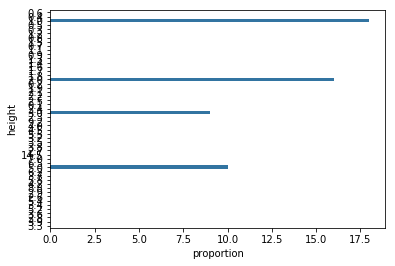

In [12]:
sb.countplot(data = pokemon_heights, y = pokemon['height'], color=base_color, order = height_order)
plt.xlabel('proportion');

### visualizing null data

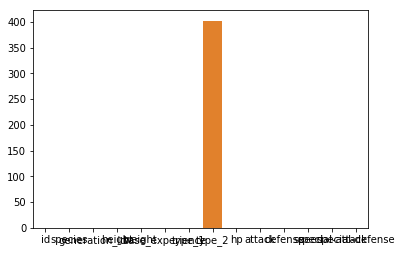

In [13]:
na_counts = pokemon.isna().sum()
base_color = sb.color_palette()[1]
sb.barplot(na_counts.index.values, na_counts, color = base_color)

The above example would of course work better if some of our data was null

### Pie Charts

only to be used to plot quantitaive relative data

works best with only two or three different categories

(-1.1005682774772039,
 1.1026929798564016,
 -1.100628961854673,
 1.1026322954789325)

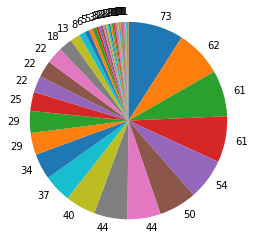

In [14]:
plt.pie(pokemon_heights, labels=pokemon_heights, startangle=90, counterclock=False);
plt.axis('square')

## histogram

good for quantitaive numeric data

can be done with matplotlib .hist or seaborn .distplot

matplotlib defaults histograms to ten bins

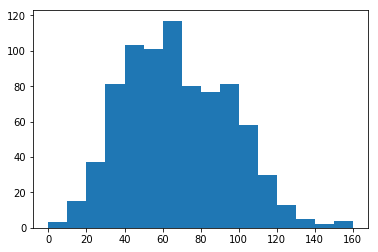

In [15]:

bins = np.arange(0, pokemon['speed'].max() +5, 10)
plt.hist(data = pokemon, x='speed', bins=bins);

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


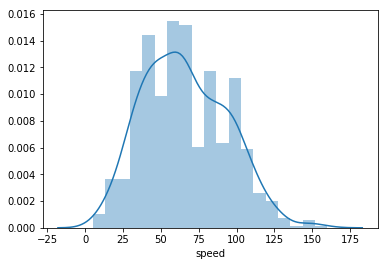

In [16]:
sb.distplot(pokemon['speed']);

to remove the line use the kde argument

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


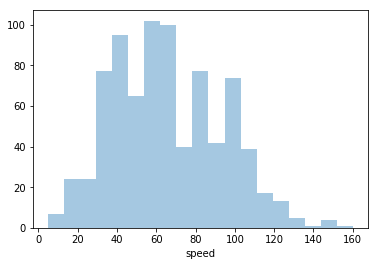

In [17]:
sb.distplot(pokemon['speed'], kde=False)

under the hood matplotlib takes three steps to crete a visualization. 

1. first a 'figure' object is created to house the visualization

In [32]:
figure = plt.figure()

<Figure size 432x288 with 0 Axes>

2. second a number of axis are created in the figure to hold our data. the fist two elements of the list we pass in are the lower left hand corners of the axis. The third and fourth elements represent the length of each axis.

In [33]:
ax = figure.add_axes([.125, .125, .775,.755])

3. Finally the data is plotted to axis with a method like .hist. This is the only step thats really required but knowledge of the other two can help make our graphs more customizable. 

In [29]:
ax.hist(data=pokemon, x="speed");

the above 3 lines of code could be done more quickly but less percisely with the single following line

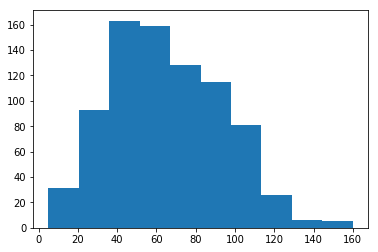

In [25]:
plt.hist(data=pokemon, x="speed");

we can also use our custom axis in seaborn but we do that by passing the axis as a argument to a seaborn plot method instead of calling a plot on the axis

In [34]:
sb.countplot(data=pokemon, x='speed', ax=ax)

Below is an example of plotting multiple graphs side by side. Hint: try commenting out one of the plt.subplot lines and then the two graphs will become one stacked on each other

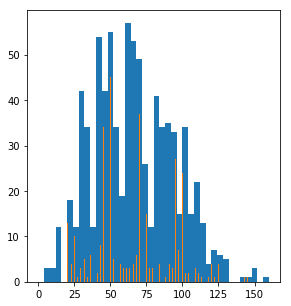

In [43]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

# example of somewhat too-small bin size
#plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

The graphs above are a little hard to read. We can fix this by putting some space between each bin

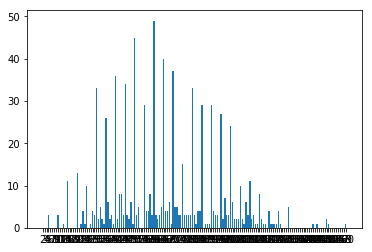

In [51]:
bin_edges = np.arange(1.5,pokemon['speed'].max()+1,1)
plt.hist(pokemon['speed'], bins=bin_edges, rwidth=0.7)
plt.xticks(np.arange(2,pokemon['speed'].max()+1,1));